1. Perform the KNN on Sonar dataset with and without in-built functions for K=1, 3, 5, 7.
2. Break the 60 features into 6 subsets having 10 features each. Perform the KNN and then compare the performance.
3. Divide them into 6 subsets and perform the classification on each subset. Then perform the majority voting for classification.
4. Also, perform the same tasks for 5 subsets.

In [174]:
# This assignment is done by CS20B1044 Avinash R Changrani
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [175]:
df = pd.read_csv("./sonar.all-data.csv")
df.describe
#df.shape


<bound method NDFrame.describe of      0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109  \
0    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
1    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
2    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
3    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
4    0.0286  0.0453  0.0277  0.0174  0.0384  0.0990  0.1201  0.1833  0.2105   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
202  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
203  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
204  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
205  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
206  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

     0.2111  ... 

In [176]:
df_features = df.iloc[:,0:60]
df_outcomes = df.iloc[:,60]
#df_features.head
#df_outcomes.head
X = np.array(df_features)
y = np.array(df_outcomes)

In [177]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,accuracy_score

# Perform the KNN on Sonar dataset with and without in-built functions for K=1, 3, 5, 7.
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

k_values = [1,3,5,7]

# with sklearn
for k in k_values:
    knn = KNeighborsClassifier(k)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    print("For k = " + str(k) + " is ")
    print(classification_report(y_test, pred))

For k = 1 is 
              precision    recall  f1-score   support

           M       0.83      0.83      0.83        36
           R       0.78      0.78      0.78        27

    accuracy                           0.81        63
   macro avg       0.81      0.81      0.81        63
weighted avg       0.81      0.81      0.81        63

For k = 3 is 
              precision    recall  f1-score   support

           M       0.84      0.86      0.85        36
           R       0.81      0.78      0.79        27

    accuracy                           0.83        63
   macro avg       0.82      0.82      0.82        63
weighted avg       0.82      0.83      0.82        63

For k = 5 is 
              precision    recall  f1-score   support

           M       0.80      0.78      0.79        36
           R       0.71      0.74      0.73        27

    accuracy                           0.76        63
   macro avg       0.76      0.76      0.76        63
weighted avg       0.76      0.7

In [178]:
# Without sklearn
import scipy.spatial
from collections import Counter
class KNN:
    def __init__(self, k):
        self.k = k
        
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    
    def predict(self, X_test):
        final_output = []
        for i in range(len(X_test)):
            d = []
            votes = []
            for j in range(len(self.X_train)):
                dist = scipy.spatial.distance.euclidean(self.X_train[j] , X_test[i])
                d.append([dist, j])
            d.sort()
            d = d[0:self.k]
            for d, j in d:
                votes.append(y_train[j])
            ans = Counter(votes).most_common(1)[0][0]
            final_output.append(ans)
            
        return final_output

    def score(self, X_test, y_test):
        predictions = self.predict(X_test)
        return (predictions == y_test).sum() / len(y_test)
        
for k in k_values:
    clf = KNN(k)
    clf.fit(X_train, y_train)
    prediction = clf.predict(X_test)
    print("Accuracy for k = " + str(k) + " is " + str(clf.score(X_test, y_test)))

Accuracy for k = 1 is 0.8095238095238095
Accuracy for k = 3 is 0.8253968253968254
Accuracy for k = 5 is 0.7619047619047619
Accuracy for k = 7 is 0.7142857142857143


[[0.6984126984126984, 0.7301587301587301, 0.7777777777777778, 0.7301587301587301], [0.7936507936507936, 0.7777777777777778, 0.7619047619047619, 0.7619047619047619], [0.7936507936507936, 0.7301587301587301, 0.7142857142857143, 0.5873015873015873], [0.7936507936507936, 0.7301587301587301, 0.6984126984126984, 0.6666666666666666], [0.7142857142857143, 0.6349206349206349, 0.6507936507936508, 0.6666666666666666], [0.6190476190476191, 0.6507936507936508, 0.6507936507936508, 0.6666666666666666]]


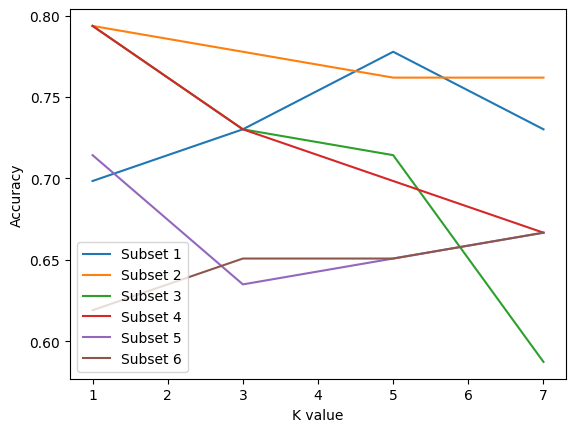

In [179]:
# Break the 60 features into 6 subsets having 10 features each. Perform the KNN and then compare the performance.

# with sklearn

x_test  = []
x_train = []

for i in range(6):
    x_test.append(X_test[:,i*10:(i+1)*10])
    x_train.append(X_train[:,i*10:(i+1)*10])

# print(len(x_train))
# print(len(x_test))

accuracies = []
for i in range(6):
    temp = []
    for k in k_values:
        knn = KNeighborsClassifier(k)
        knn.fit(x_train[i],y_train)
        pred = knn.predict(x_test[i])
        temp.append(accuracy_score(y_test, pred))
    accuracies.append(temp)

print(accuracies)

# plotting the accuracies
for i in range(6):
    temp = "Subset " + str(i+1)
    plt.plot(k_values,accuracies[i],label=temp)

plt.xlabel("K value")
plt.ylabel("Accuracy")    
plt.legend()
plt.show()

The Accuracy for Subset 1 for k = 1 is 0.6984126984126984
The Accuracy for Subset 1 for k = 3 is 0.7301587301587301
The Accuracy for Subset 1 for k = 5 is 0.7777777777777778
The Accuracy for Subset 1 for k = 7 is 0.7301587301587301
The Accuracy for Subset 2 for k = 1 is 0.7936507936507936
The Accuracy for Subset 2 for k = 3 is 0.7777777777777778
The Accuracy for Subset 2 for k = 5 is 0.7619047619047619
The Accuracy for Subset 2 for k = 7 is 0.7619047619047619
The Accuracy for Subset 3 for k = 1 is 0.7936507936507936
The Accuracy for Subset 3 for k = 3 is 0.7301587301587301
The Accuracy for Subset 3 for k = 5 is 0.7142857142857143
The Accuracy for Subset 3 for k = 7 is 0.5873015873015873
The Accuracy for Subset 4 for k = 1 is 0.7936507936507936
The Accuracy for Subset 4 for k = 3 is 0.7301587301587301
The Accuracy for Subset 4 for k = 5 is 0.6984126984126984
The Accuracy for Subset 4 for k = 7 is 0.6666666666666666
The Accuracy for Subset 5 for k = 1 is 0.7142857142857143
The Accuracy f

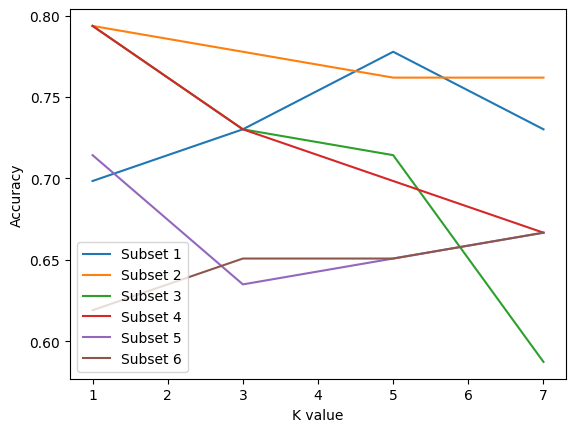

In [180]:
# without sklearn
accuracies = []
for i in range(6):
    temp = []
    for k in k_values:
        clf = KNN(k)
        clf.fit(x_train[i], y_train)
        prediction = clf.predict(x_test[i])
        temp.append(clf.score(x_test[i], y_test))
    accuracies.append(temp)

for i in range(len(accuracies)):
    for j in range(len(accuracies[i])):
        print("The Accuracy for Subset " + str(i+1) + " for k = " + str(k_values[j]) + " is " + str(accuracies[i][j]))

# plotting the accuracies
for i in range(6):
    temp = "Subset " + str(i+1)
    plt.plot(k_values,accuracies[i],label=temp)

plt.xlabel("K value")
plt.ylabel("Accuracy")    
plt.legend()
plt.show()

In [181]:
# Divide them into 6 subsets and perform the classification on each subset. (Already done above) Then perform the majority voting for classification.

outcomes = []
accuracies = []

for k in k_values:
    temp = []
    outcomes = []
    for i in range(6):
        clf = KNN(k)
        clf.fit(x_train[i], y_train)
        prediction = clf.predict(x_test[i])
        temp.append(prediction)
    #print(temp)
    for i in range(len(temp[0])):
        count_r = 0
        count_m = 0
        for j in range(6):
            if(temp[j][i] == 'R'): count_r += 1
            else: count_m += 1
        if(count_r > count_m): outcomes.append('R')
        else: outcomes.append('M')
    #print(outcomes)
    ans = (outcomes == y_test).sum() / len(y_test)
    accuracies.append(ans)

# The Accuracy using majority voting of classification using all subsets 
print(accuracies)       


[0.8888888888888888, 0.8888888888888888, 0.8412698412698413, 0.7777777777777778]


The Accuracy for Subset 1 for k = 1 is 0.7936507936507936
The Accuracy for Subset 1 for k = 3 is 0.8253968253968254
The Accuracy for Subset 1 for k = 5 is 0.8253968253968254
The Accuracy for Subset 1 for k = 7 is 0.7936507936507936
The Accuracy for Subset 2 for k = 1 is 0.7777777777777778
The Accuracy for Subset 2 for k = 3 is 0.7301587301587301
The Accuracy for Subset 2 for k = 5 is 0.6984126984126984
The Accuracy for Subset 2 for k = 7 is 0.6349206349206349
The Accuracy for Subset 3 for k = 1 is 0.7301587301587301
The Accuracy for Subset 3 for k = 3 is 0.7619047619047619
The Accuracy for Subset 3 for k = 5 is 0.7301587301587301
The Accuracy for Subset 3 for k = 7 is 0.6984126984126984
The Accuracy for Subset 4 for k = 1 is 0.7301587301587301
The Accuracy for Subset 4 for k = 3 is 0.8095238095238095
The Accuracy for Subset 4 for k = 5 is 0.7619047619047619
The Accuracy for Subset 4 for k = 7 is 0.7142857142857143
The Accuracy for Subset 5 for k = 1 is 0.47619047619047616
The Accuracy 

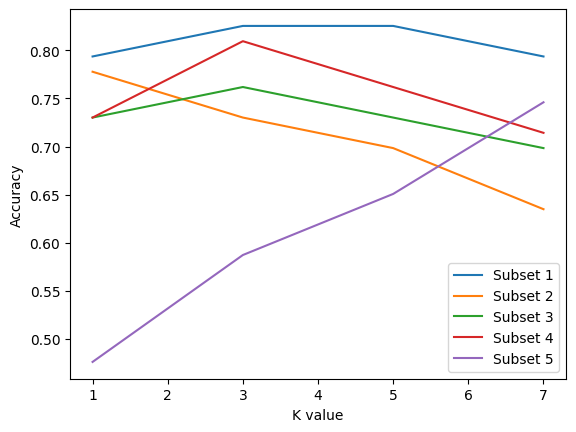

In [182]:
# for Number of Subsets = 5 

x_test  = []
x_train = []

for i in range(5):
    x_test.append(X_test[:,i*12:(i+1)*12])
    x_train.append(X_train[:,i*12:(i+1)*12])

# print(len(x_train))
# print(len(x_test))

accuracies = []
for i in range(5):
    temp = []
    for k in k_values:
        knn = KNeighborsClassifier(k)
        knn.fit(x_train[i],y_train)
        pred = knn.predict(x_test[i])
        temp.append(accuracy_score(y_test, pred))
    accuracies.append(temp)

for i in range(len(accuracies)):
    for j in range(len(accuracies[i])):
        print("The Accuracy for Subset " + str(i+1) + " for k = " + str(k_values[j]) + " is " + str(accuracies[i][j]))

# plotting the accuracies
for i in range(5):
    temp = "Subset " + str(i+1)
    plt.plot(k_values,accuracies[i],label=temp)

plt.xlabel("K value")
plt.ylabel("Accuracy")    
plt.legend()
plt.show()

The Accuracy for Subset 1 for k = 1 is 0.7936507936507936
The Accuracy for Subset 1 for k = 3 is 0.8253968253968254
The Accuracy for Subset 1 for k = 5 is 0.8253968253968254
The Accuracy for Subset 1 for k = 7 is 0.7936507936507936
The Accuracy for Subset 2 for k = 1 is 0.7777777777777778
The Accuracy for Subset 2 for k = 3 is 0.7301587301587301
The Accuracy for Subset 2 for k = 5 is 0.6984126984126984
The Accuracy for Subset 2 for k = 7 is 0.6349206349206349
The Accuracy for Subset 3 for k = 1 is 0.7301587301587301
The Accuracy for Subset 3 for k = 3 is 0.7619047619047619
The Accuracy for Subset 3 for k = 5 is 0.7301587301587301
The Accuracy for Subset 3 for k = 7 is 0.6984126984126984
The Accuracy for Subset 4 for k = 1 is 0.7301587301587301
The Accuracy for Subset 4 for k = 3 is 0.8095238095238095
The Accuracy for Subset 4 for k = 5 is 0.7619047619047619
The Accuracy for Subset 4 for k = 7 is 0.7142857142857143
The Accuracy for Subset 5 for k = 1 is 0.47619047619047616
The Accuracy 

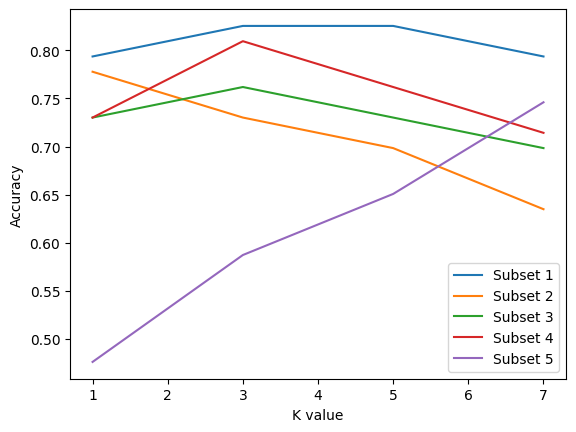

In [183]:
# without sklearn
accuracies = []
for i in range(5):
    temp = []
    for k in k_values:
        clf = KNN(k)
        clf.fit(x_train[i], y_train)
        prediction = clf.predict(x_test[i])
        temp.append(clf.score(x_test[i], y_test))
    accuracies.append(temp)

for i in range(len(accuracies)):
    for j in range(len(accuracies[i])):
        print("The Accuracy for Subset " + str(i+1) + " for k = " + str(k_values[j]) + " is " + str(accuracies[i][j]))

# plotting the accuracies
for i in range(5):
    temp = "Subset " + str(i+1)
    plt.plot(k_values,accuracies[i],label=temp)

plt.xlabel("K value")
plt.ylabel("Accuracy")    
plt.legend()
plt.show()

In [184]:
# Divide them into 5 subsets and perform the classification on each subset. (Already done above) Then perform the majority voting for classification.
outcomes = []
accuracies = []

for k in k_values:
    temp = []
    outcomes = []
    for i in range(5):
        clf = KNN(k)
        clf.fit(x_train[i], y_train)
        prediction = clf.predict(x_test[i])
        temp.append(prediction)
    #print(temp)
    for i in range(len(temp[0])):
        count_r = 0
        count_m = 0
        for j in range(5):
            if(temp[j][i] == 'R'): count_r += 1
            else: count_m += 1
        if(count_r > count_m): outcomes.append('R')
        else: outcomes.append('M')
    #print(outcomes)
    ans = (outcomes == y_test).sum() / len(y_test)
    accuracies.append(ans)

# The Accuracy using majority voting of classification using all subsets 
print(accuracies)       

[0.7619047619047619, 0.8888888888888888, 0.8888888888888888, 0.8571428571428571]
